In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [ ]:
df = pd.read_csv('kc_house_data.csv')
y_price = df['price']
x_params = df.loc[:,['bedrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','grade','sqft_above','age','renovation_age','zipcode','lat','long','sqft_living15','sqft_lot15']]
print(y_price)
print(x_params)

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64
       bedrooms  sqft_living  sqft_lot  floors  waterfront  view  condition  \
0             3         1180      5650     1.0           0     0          3   
1             3         2570      7242     2.0           0     0          3   
2             2          770     10000     1.0           0     0          3   
3             4         1960      5000     1.0           0     0          5   
4             3         1680      8080     1.0           0     0          3   
...         ...          ...       ...     ...         ...   ...        ...   
21608         3         1530      1131     3.0           0     0          3   
21609         4         2310      5813     2.0           0     0          3   
21610         2         1020      1350     2.0  

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    x_params, y_price, test_size=0.1, random_state=101)
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

19451
2162
19451
2162


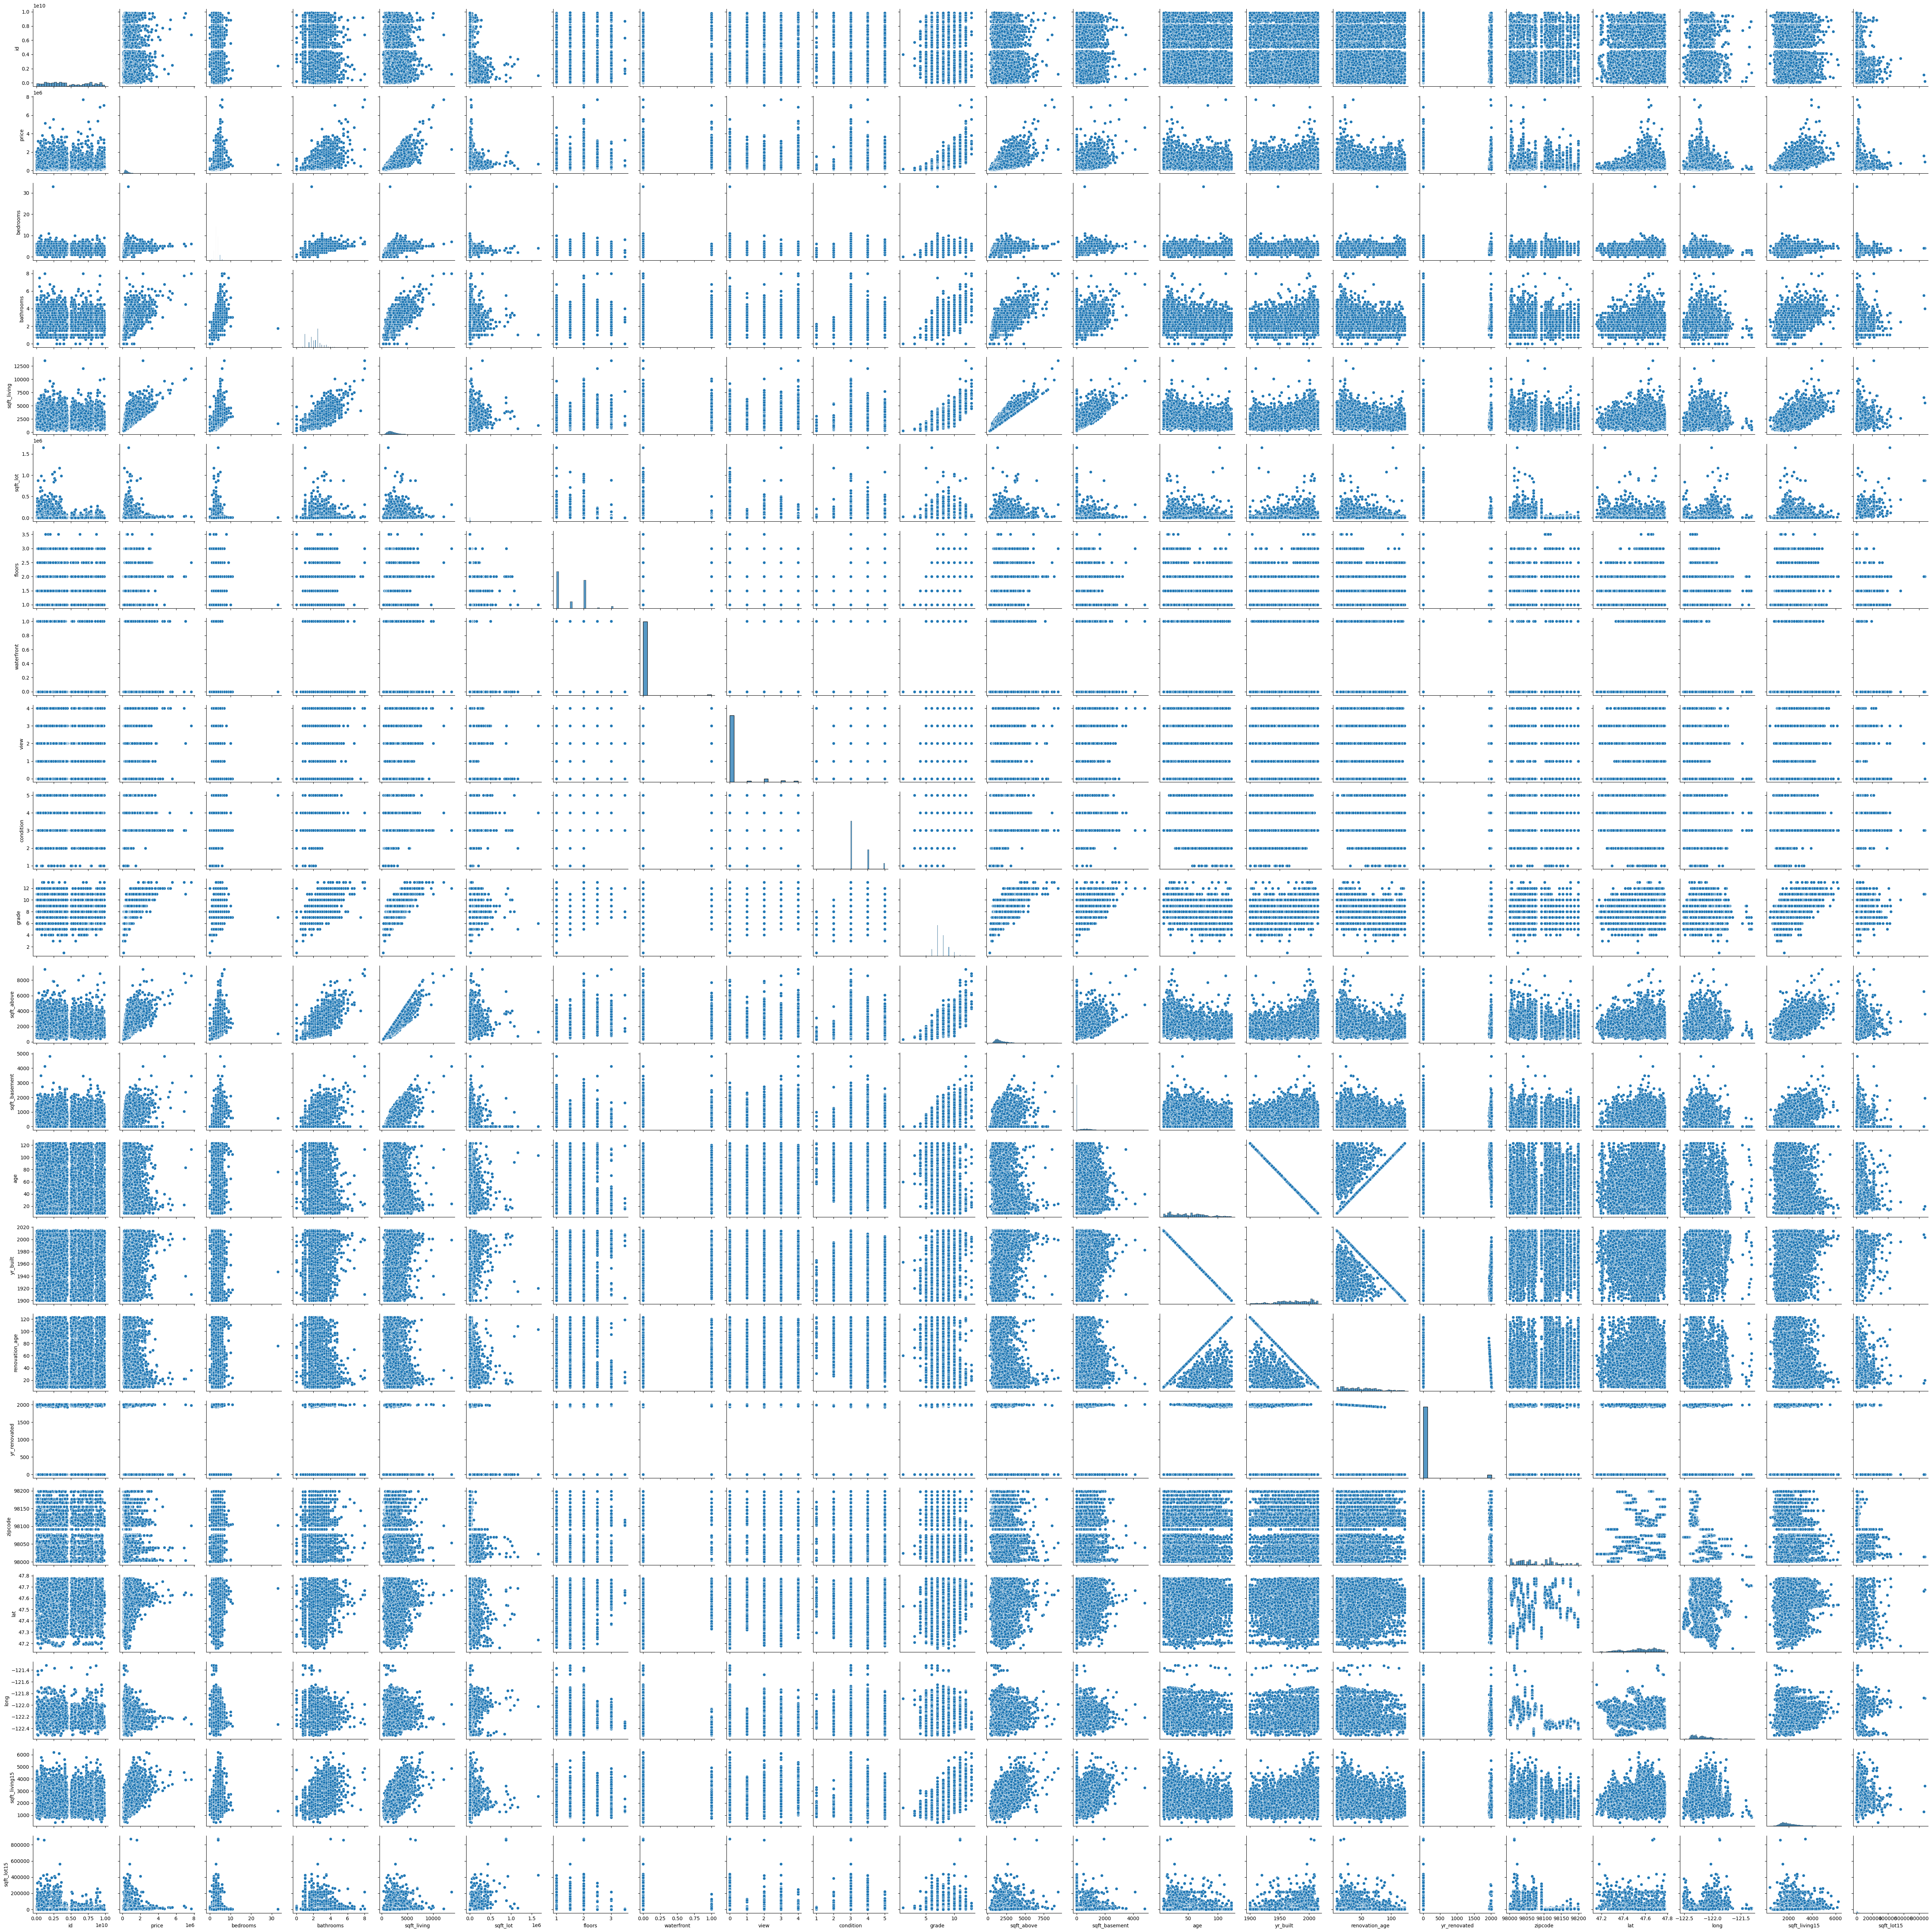

In [ ]:
sns.pairplot(df)

<ipython-input-34-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

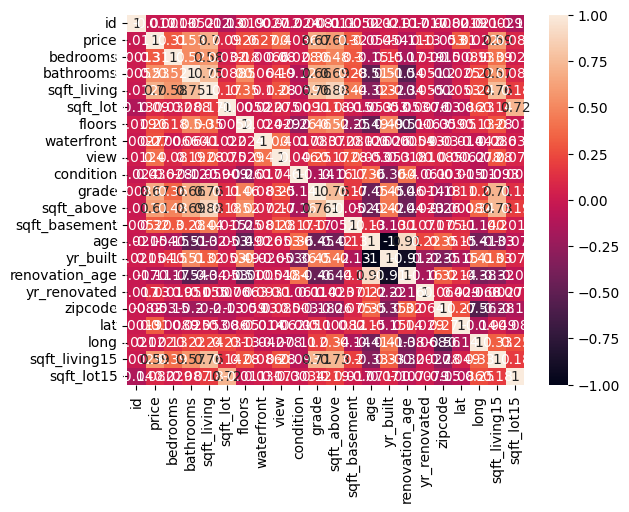

In [ ]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
sc = StandardScaler()
sc.fit(x_train)
x_train = sc.transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
price_predict = model.predict(x_test)

In [ ]:
print("Model accuracy = ",model.score(x_test, y_test))

Model accuracy =  0.693797079081244


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
print("Mean absolute percentage error = ",mean_absolute_percentage_error(y_test, price_predict))

Mean absolute percentage error =  0.2421304924560894
